# Coursework 2: Natural Language Processing

> The aim of this task is to learn the Formal grammars and parsing.

***NOTE***: Based on chapters 11, 12, 13, 14 of Jurefsky and Martin*
https://web.stanford.edu/~jurafsky/slp3/11.pdf

In [1]:
import nltk
from nltk import tree
from nltk.corpus import treebank
from nltk import Nonterminal
from nltk import induce_pcfg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk import tokenize
from nltk.grammar import toy_pcfg1
from nltk.parse import pchart
from nltk.parse import ViterbiParser

In [2]:
def loadData(path):
    with open(path,'r') as f:
        data = f.read().split('\n')
    return data

def getTreeData(data):
    return map(lambda s: tree.Tree.fromstring(s), data)

In [3]:
# Main script
print("loading data..")
data = loadData('parseTrees.txt')
print("generating trees..")
treeData = getTreeData(data)
print("done!")

loading data..
generating trees..
done!


# Task 1

** Rules from the page 3**
* Det → the
* Noun → flight
* Nominal → Noun | Nominal Noun


** Rules from the page 4**
* S → NP VP
* VP → Verb NP
* VP → Verb PP
* PP → Preposition NP 


** Rules from the page 5**
* Noun → flights | morning
* Proper-Noun → Baltimore | United | American
* Determiner → the | that
* Preposition → from | to | near
* NP → Proper-Noun
* VP → Verb NP | Verb PP
* PP → Preposition NP


**Rules from the page 9**
* Det → NP


**Added rules:**
* S -> NP | PP | NP N | N N | NP S
* VP ->  N PP 
* NP ->  Det V

In [4]:
list1 = ["Baltimore", "to Baltimore", "near Baltimore", "the flight", "American’s flights", "morning flight", 
        "one flight", "any flight", "any morning flight from Baltimore", "United’s flight to Baltimore", 
        "any flight leaving from Baltimore", "any flight that serves lunch", "United’s pilot’s protests"]

In [5]:
grammar1 = nltk.CFG.fromstring("""
S ->  NP | PP | N N | NP S
VP -> V NP | N PP | V PP
PP -> P NP
Nom -> N | Nom N
PN -> "Baltimore" | "American’s" | "United’s"
NP -> PN | Det N | Det V
Det -> "that" | "the" | "that" | "one" | "any" | NP
N -> "flight" | "flights" | "morning" | "lunch" | "pilot’s"
V -> "serves" | "leaving" | "protests"
P -> "to" | "near" | "from"
""")

In [6]:
# CYK algorithm
parser1 = nltk.ChartParser(grammar1)
for i in list1:
    print( "\033[1m" + i + "\033[0;0m")
    for tree in parser1.parse(i.split()):
        print(tree)
    print("\n")

Baltimore
(S (NP (PN Baltimore)))


to Baltimore
(S (PP (P to) (NP (PN Baltimore))))


near Baltimore
(S (PP (P near) (NP (PN Baltimore))))


the flight
(S (NP (Det the) (N flight)))


American’s flights
(S (NP (Det (NP (PN American’s))) (N flights)))


morning flight
(S (N morning) (N flight))


one flight
(S (NP (Det one) (N flight)))


any flight
(S (NP (Det any) (N flight)))


any morning flight from Baltimore
(S
  (NP (Det (NP (Det any) (N morning))) (N flight))
  (S (PP (P from) (NP (PN Baltimore)))))


United’s flight to Baltimore
(S
  (NP (Det (NP (PN United’s))) (N flight))
  (S (PP (P to) (NP (PN Baltimore)))))


any flight leaving from Baltimore
(S
  (NP (Det (NP (Det any) (N flight))) (V leaving))
  (S (PP (P from) (NP (PN Baltimore)))))


any flight that serves lunch
(S
  (NP (Det any) (N flight))
  (S (NP (Det (NP (Det that) (V serves))) (N lunch))))


United’s pilot’s protests
(S (NP (Det (NP (Det (NP (PN United’s))) (N pilot’s))) (V protests)))




# Task 2

** Rules from the page  3**
* NP → ProperNoun
* P → Det Nominal
* Det → a
* Det → the
* Noun → flight

** Rules from the page  4**
* S → NP VP

** Rules from the page  5**
* NP → Pronoun
* Pronoun → I
* Proper-Noun → Baltimore | American
* Verb → like | need | fly
* Preposition → from | to | on
* Conjunction → and

** Rules from the page  7**
* S → Aux NP VP

** Rules from the page  21**
* VP → VP PP

**Added rules:**
* S -> Wh-NP Aux NP PP PP | RB NP
* NP -> V Det
* PN -> PN Conj PN
* VP -> V NP | V PP | P VP | V VP
* PP -> P NP
* Det -> NP

In [7]:
list2 = ["Do American Airlines have a flight between Baltimore and Denver?", 
         "I would like to fly on American airlines.", 
         "Please repeat that.", "I need to fly between Philadelphia and Atlanta.", 
         "What is the fare from Atlanta to Denver?", "We flew to Baltimore and Denver."]

In [8]:
# The word "please" is udentified as an adverb, according to Merriam-Webster dictionary, 
# despite Jurefsky and Martin mentioned it as a politeness markers in the 10th chapter
# https://www.merriam-webster.com/dictionary/please?show=1&t=1319640457

grammar2 = nltk.CFG.fromstring("""
S -> Aux NP VP | Wh-NP Aux NP PP PP | NP VP | RB NP
NP -> PN | Det N | Pronoun | V Det
PN -> PN Conj PN
VP -> V NP | VP PP | V PP | P VP | V VP
PP -> P NP

Aux -> "Do" | "is"
Det -> "a" | "that" | "the"| NP
Pronoun -> "I" | "We"
PN -> "American" | "Baltimore" | "Denver" | "Philadelphia" | "Atlanta"
N -> "Airlines" | "flight" | "airlines" | "fare"
V -> "have" | "would" | "like" | "fly" | "repeat" | "need" | "flew"
P -> "between" | "on" | "from" | "to"
Conj -> "and"
RB -> "Please"
Wh-NP -> "What"
""")

In [9]:
import re
parser2 = nltk.ChartParser(grammar2)

for i in list2:
    print( "\033[1m" + i + "\033[0;0m")
    a = re.sub(r'[^\w\s]','', i)
    for tree in parser2.parse(a.split()):
        print(tree)
    print("\n")

Do American Airlines have a flight between Baltimore and Denver?
(S
  (Aux Do)
  (NP (Det (NP (PN American))) (N Airlines))
  (VP
    (VP (V have) (NP (Det a) (N flight)))
    (PP (P between) (NP (PN (PN Baltimore) (Conj and) (PN Denver))))))


I would like to fly on American airlines.
(S
  (NP (Pronoun I))
  (VP
    (V would)
    (VP
      (V like)
      (VP
        (P to)
        (VP
          (V fly)
          (PP (P on) (NP (Det (NP (PN American))) (N airlines))))))))


Please repeat that.
(S (RB Please) (NP (V repeat) (Det that)))


I need to fly between Philadelphia and Atlanta.
(S
  (NP (Pronoun I))
  (VP
    (V need)
    (VP
      (P to)
      (VP
        (V fly)
        (PP
          (P between)
          (NP (PN (PN Philadelphia) (Conj and) (PN Atlanta))))))))


What is the fare from Atlanta to Denver?
(S
  (Wh-NP What)
  (Aux is)
  (NP (Det the) (N fare))
  (PP (P from) (NP (PN Atlanta)))
  (PP (P to) (NP (PN Denver))))


We flew to Baltimore and Denver.
(S
  (NP (Pronoun We

# Task 3

    To download Penn Treebank, need to execute 
    nltk.download()
    and install Penn Treebank corpora manually

In [10]:
# here we load in the sentences
sentence22 = treebank.parsed_sents('wsj_0003.mrg')[21]
sentence7 = treebank.parsed_sents('wsj_0003.mrg')[6]
sentence13 = treebank.parsed_sents('wsj_0004.mrg')[12]

(S
  (PP-TMP (IN In) (NP (NNP July)))
  (, ,)
  (NP-SBJ (DT the) (NNP Environmental) (NNP Protection) (NNP Agency))
  (VP
    (VBD imposed)
    (NP (DT a) (JJ gradual) (NN ban))
    (PP-CLR
      (IN on)
      (NP
        (NP (ADJP (RB virtually) (DT all)) (NNS uses))
        (PP (IN of) (NP (NN asbestos))))))
  (. .))


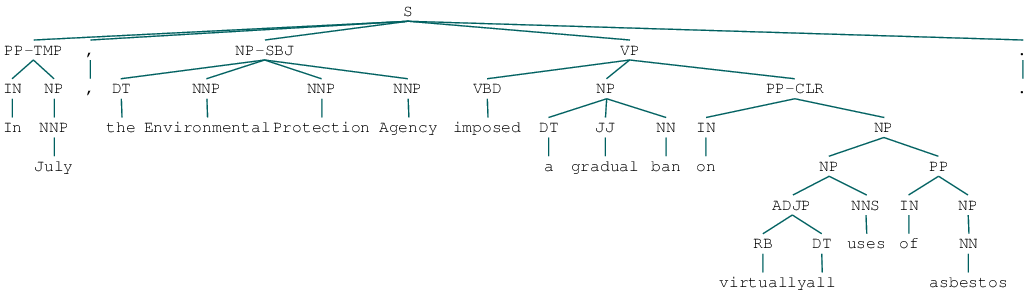

In [11]:
print(sentence22)
sentence22

In [12]:
tbank_productions = []

# Extract the rules (productions) for the sentence
for sent in sentence22:
    for production in sent.productions():
        tbank_productions.append(production)
        
tbank_productions

[PP-TMP -> IN NP,
 IN -> 'In',
 NP -> NNP,
 NNP -> 'July',
 , -> ',',
 NP-SBJ -> DT NNP NNP NNP,
 DT -> 'the',
 NNP -> 'Environmental',
 NNP -> 'Protection',
 NNP -> 'Agency',
 VP -> VBD NP PP-CLR,
 VBD -> 'imposed',
 NP -> DT JJ NN,
 DT -> 'a',
 JJ -> 'gradual',
 NN -> 'ban',
 PP-CLR -> IN NP,
 IN -> 'on',
 NP -> NP PP,
 NP -> ADJP NNS,
 ADJP -> RB DT,
 RB -> 'virtually',
 DT -> 'all',
 NNS -> 'uses',
 PP -> IN NP,
 IN -> 'of',
 NP -> NN,
 NN -> 'asbestos',
 . -> '.']

(S
  (NP-SBJ (EX There))
  (VP
    (VBZ is)
    (NP-PRD (DT no) (NN asbestos))
    (PP-LOC (IN in) (NP (PRP$ our) (NNS products)))
    (ADVP-TMP (RB now)))
  (. .)
  ('' ''))


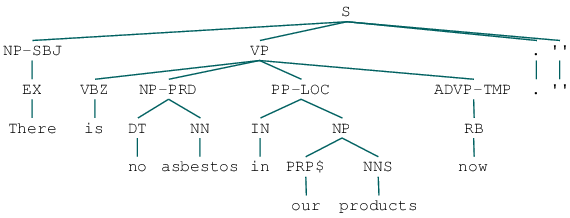

In [13]:
print(sentence7)
sentence7

In [14]:
tbank_productions = []

# Extract the rules (productions) for the sentence
for sent in sentence7:
    for production in sent.productions():
        tbank_productions.append(production)
        
tbank_productions

[NP-SBJ -> EX,
 EX -> 'There',
 VP -> VBZ NP-PRD PP-LOC ADVP-TMP,
 VBZ -> 'is',
 NP-PRD -> DT NN,
 DT -> 'no',
 NN -> 'asbestos',
 PP-LOC -> IN NP,
 IN -> 'in',
 NP -> PRP$ NNS,
 PRP$ -> 'our',
 NNS -> 'products',
 ADVP-TMP -> RB,
 RB -> 'now',
 . -> '.',
 '' -> "''"]

(S
  (NP-SBJ (DT The) (JJ top) (NN money) (NNS funds))
  (VP
    (VBP are)
    (ADVP-TMP (RB currently))
    (VP (VBG yielding) (NP (QP (RB well) (IN over) (CD 9)) (NN %))))
  (. .))


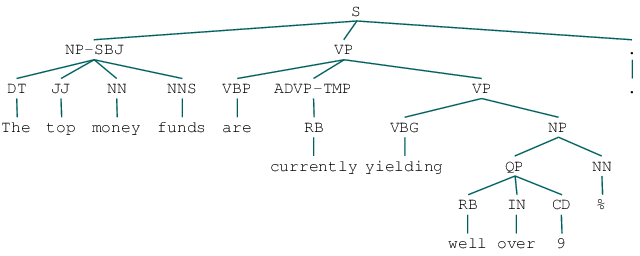

In [15]:
print(sentence13)
sentence13

In [16]:
tbank_productions = []

# Extract the rules (productions) for the sentence
for sent in sentence13:
    for production in sent.productions():
        tbank_productions.append(production)
        
tbank_productions

[NP-SBJ -> DT JJ NN NNS,
 DT -> 'The',
 JJ -> 'top',
 NN -> 'money',
 NNS -> 'funds',
 VP -> VBP ADVP-TMP VP,
 VBP -> 'are',
 ADVP-TMP -> RB,
 RB -> 'currently',
 VP -> VBG NP,
 VBG -> 'yielding',
 NP -> QP NN,
 QP -> RB IN CD,
 RB -> 'well',
 IN -> 'over',
 CD -> '9',
 NN -> '%',
 . -> '.']

# Task 4

a) Initial sentence:
"List me the seats on the flight to Denver"

    1) List me the seats on the flight to Denver.
    Please mention all available seats on the flight to Denver. Direct meaning.
    
    2) List me the seats... on the flight to Denver.
    Please send me the list of seats, I have a flight to Denver right now. 

    3) List me, the seats on the flight to Denver.
    Write me, seats are already on the flight.
    
    4) List me the seats on the flight to Denver.
    Send me the list while you are on the flight.

b) Replacing grammar_script.py with the rules

In [17]:
sentence = ['List', 'me', 'the', 'seats', 'on', 'the', 'flight', 'to', 'Denver']
# here we define a grammar
# IVP stands for imperative verb phrase
# IVerb stands for imperative verb
# S -> NP VP
grammar3 = nltk.CFG.fromstring("""
S -> IVP
IVP -> IVerb NP PP PP
NP -> Det Det N | PN | Det N
PP -> P NP

PN -> "Denver"
Det -> 'me' | 'the'
N -> 'seats' | 'flight'
IVerb -> 'List'
P -> 'on' | 'to' 
""")

In [18]:
parser3 = nltk.ChartParser(grammar3)
for tree in parser3.parse(sentence):
    print(tree)

(S
  (IVP
    (IVerb List)
    (NP (Det me) (Det the) (N seats))
    (PP (P on) (NP (Det the) (N flight)))
    (PP (P to) (NP (PN Denver)))))


Lets find all possible parses of the above sentence.

In [19]:
grammar4 = nltk.CFG.fromstring("""
S -> VP PP PP | V NP
PP -> P NP | P N P
VP -> V NP | N PP
NP -> 'Denver' | Det N | Det NP | N P | NP NP
Det -> 'me' | 'the'
N -> 'seats' | 'flight'
V -> 'List'
P -> 'on' | 'to' 
""")

In [20]:
parser4 = nltk.ChartParser(grammar4)
for tree in parser4.parse(sentence):
    print(tree)

(S
  (V List)
  (NP
    (Det me)
    (NP
      (Det the)
      (NP
        (NP
          (NP (N seats) (P on))
          (NP (Det the) (NP (N flight) (P to))))
        (NP Denver)))))
(S
  (V List)
  (NP
    (Det me)
    (NP
      (Det the)
      (NP
        (NP (N seats) (P on))
        (NP (NP (Det the) (NP (N flight) (P to))) (NP Denver))))))
(S
  (V List)
  (NP
    (Det me)
    (NP
      (Det the)
      (NP
        (NP (N seats) (P on))
        (NP (Det the) (NP (NP (N flight) (P to)) (NP Denver)))))))
(S
  (V List)
  (NP
    (Det me)
    (NP
      (NP
        (NP (Det the) (NP (N seats) (P on)))
        (NP (Det the) (NP (N flight) (P to))))
      (NP Denver))))
(S
  (V List)
  (NP
    (Det me)
    (NP
      (NP
        (Det the)
        (NP
          (NP (N seats) (P on))
          (NP (Det the) (NP (N flight) (P to)))))
      (NP Denver))))
(S
  (V List)
  (NP
    (Det me)
    (NP
      (NP (Det the) (NP (N seats) (P on)))
      (NP (NP (Det the) (NP (N flight) (P to))) (NP Denv

Repeating the fist grammar, adding the new rule: 
NP -> NP PP
No new parses appeared

In [21]:
# c)
grammar5 = nltk.CFG.fromstring("""
S -> IVP
IVP -> IVerb NP PP PP
NP -> Det Det N | PN | Det N | NP PP
PP -> P NP

PN -> "Denver"
Det -> 'me' | 'the'
N -> 'seats' | 'flight'
IVerb -> 'List'
P -> 'on' | 'to' 
""")

In [22]:
parser5 = nltk.ChartParser(grammar5)
for tree in parser5.parse(sentence):
    print(tree)

(S
  (IVP
    (IVerb List)
    (NP (Det me) (Det the) (N seats))
    (PP (P on) (NP (Det the) (N flight)))
    (PP (P to) (NP (PN Denver)))))


No new parses appeared

e) Transform CFG tree to dependency tree.
(S
  (IVP
    (IVerb List)
    (NP (Det me) (Det the) (N seats))
    (PP (P on) (NP (Det the) (N flight)))
    (PP (P to) (NP (PN Denver)))))

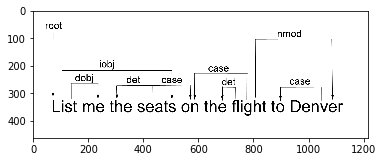

In [23]:
plt.imshow(mpimg.imread('sentence.png'))
plt.show()

# Task 5

Use of syntactic categories and the lexicon to draw a CCG parse tree for a sentence:
"We flew to Baltimore and Denver."

Used rules:
* X CONJ X ⇒ X
* X/Y Y ⇒ X
* Y X\Y ⇒ X

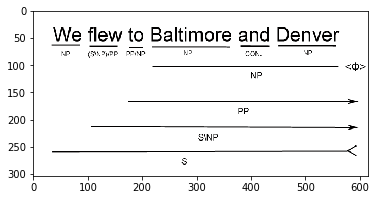

In [24]:
plt.imshow(mpimg.imread('sentence2.png'))
plt.show()

# Task 6
Load the parsted version of ATIS corpus (parseTrees.txt) and extract the CFG grammar


In [25]:
def loadData(path):
    with open(path,'r') as f:
        data = f.read().split('\n')
    return data

def getTreeData(data):
    return map(lambda s: tree.Tree.fromstring(s), data)

# Load the parsed version of ATIS corpus into NLTK
print("loading data..")
data = loadData('parseTrees.txt')
print("generating trees..")
treeData = getTreeData(data)
print("done!")

loading data..
generating trees..
done!


In [26]:
from nltk import tree
treeData_rules = []

# Extract the CFG rules (productions) for the sentence
for sent in treeData:
    for production in sent.productions():
        treeData_rules.append(production)
treeData_rules

[S -> DECL_MD,
 DECL_MD -> NP_PPSS VERB_MD NP_NN AVPNP_NP pt_char_per,
 NP_PPSS -> PRON_PPSS,
 PRON_PPSS -> i,
 i -> 'i',
 VERB_MD -> pt_verb_md,
 pt_verb_md -> 'need',
 NP_NN -> ADJ_AT NOUN_NN PREP_IN,
 ADJ_AT -> a,
 a -> 'a',
 NOUN_NN -> flight,
 flight -> 'flight',
 PREP_IN -> pt_prep_in,
 pt_prep_in -> 'from',
 AVPNP_NP -> NOUN_NP PP_NN,
 NOUN_NP -> charlotte,
 charlotte -> 'charlotte',
 PP_NN -> PREP_IN NP_NP NOUN_NN PP_NP,
 PREP_IN -> to,
 to -> 'to',
 NP_NP -> NOUN_NP RELCL_VBZ,
 NOUN_NP -> las vegas,
 las -> 'las',
 vegas -> 'vegas',
 RELCL_VBZ -> NP_WPS VERB_VBZ NP_NP,
 NP_WPS -> PRON_WPS,
 PRON_WPS -> that,
 that -> 'that',
 VERB_VBZ -> pt_verb_vbz,
 pt_verb_vbz -> 'makes',
 NP_NP -> NOUN_NP,
 NOUN_NP -> a,
 a -> 'a',
 NOUN_NN -> pt217,
 pt217 -> 'stop',
 PP_NP -> PREP_IN NOUN_NP NAPPOS_NP,
 PREP_IN -> in,
 in -> 'in',
 NOUN_NP -> saint,
 saint -> 'saint',
 NAPPOS_NP -> NOUN_NP,
 NOUN_NP -> louis,
 louis -> 'louis',
 pt_char_per -> '.',
 S -> DECL_MD,
 DECL_MD -> NP_PPSS VERB

In [27]:
# Learn the probabilities of frammar from the parsed corpus and induce PCFG grammar
S = Nonterminal('S')
grammar_PCFG = induce_pcfg(S, treeData_rules)
print(grammar_PCFG)

Grammar with 566 productions (start state = S)
    S -> DECL_MD [0.428924]
    DECL_MD -> NP_PPSS VERB_MD NP_NN AVPNP_NP pt_char_per [0.0705036]
    NP_PPSS -> PRON_PPSS [1.0]
    PRON_PPSS -> i [0.998601]
    i -> 'i' [1.0]
    VERB_MD -> pt_verb_md [0.998134]
    pt_verb_md -> 'need' [0.974299]
    NP_NN -> ADJ_AT NOUN_NN PREP_IN [0.0736596]
    ADJ_AT -> a [0.394803]
    a -> 'a' [1.0]
    NOUN_NN -> flight [0.40036]
    flight -> 'flight' [1.0]
    PREP_IN -> pt_prep_in [0.307885]
    pt_prep_in -> 'from' [0.997651]
    AVPNP_NP -> NOUN_NP PP_NN [0.0218978]
    NOUN_NP -> charlotte [0.113329]
    charlotte -> 'charlotte' [1.0]
    PP_NN -> PREP_IN NP_NP NOUN_NN PP_NP [0.0644788]
    PREP_IN -> to [0.302821]
    to -> 'to' [1.0]
    NP_NP -> NOUN_NP RELCL_VBZ [0.106612]
    NOUN_NP -> las vegas [0.112429]
    las -> 'las' [1.0]
    vegas -> 'vegas' [1.0]
    RELCL_VBZ -> NP_WPS VERB_VBZ NP_NP [0.155709]
    NP_WPS -> PRON_WPS [1.0]
    PRON_WPS -> that [1.0]
    that -> 'that' [1.0]

In [35]:
# Count the probabilities of each the parse trees of the sentence
tokens = "show me the meals on the flight from Phoenix".split()

parser = pchart.RandomChartParser(grammar_PCFG)
for t in parser.parse(tokens):
    print(t)

(S
  (IVP
    (IVerb show)
    (NP (Pronoun me))
    (NP (Det the) (Nominal (Noun meals)))
    (PP
      (Preposition on)
      (NP
        (Det the)
        (Nominal
          (Nominal (Noun flight))
          (PP
            (Preposition from)
            (NP (Proper_Noun Phoenix)))))))) (p=2.19769e-08)
(S
  (IVP
    (IVerb show)
    (NP (Pronoun me))
    (NP
      (Det the)
      (Nominal
        (Nominal (Noun meals))
        (PP
          (Preposition on)
          (NP (Det the) (Nominal (Noun flight))))))
    (PP (Preposition from) (NP (Proper_Noun Phoenix))))) (p=2.19769e-08)
(S
  (IVP
    (IVerb show)
    (NP (Pronoun me))
    (NP
      (NP (Det the) (Nominal (Noun meals)))
      (PP
        (Preposition on)
        (NP (Det the) (Nominal (Noun flight)))))
    (PP (Preposition from) (NP (Proper_Noun Phoenix))))) (p=1.35593e-08)
(S
  (IVP
    (IVerb show)
    (NP (Pronoun me))
    (NP (Det the) (Nominal (Noun meals)))
    (PP
      (Preposition on)
      (NP
        (NP (Det the